In [1]:
# this is jut to view the wide window in jupyter
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# load the libraries needed
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib.colors import LinearSegmentedColormap

## Define functions for plotting

In [4]:
def extract_region(df, chromosome, down_region, up_region, function):
    region_df = df[(df['end'] >= down_region) & (df['start'] <= up_region) & 
                   (df['seqname'].str.contains(chromosome))]
    header = region_df[['seqname','end']]
    values = region_df.iloc[:, 3:] # take only columns after "end" column
    values_func = function(values).replace(-np.inf, 0)
    return pd.concat([header, values_func], axis=1)
# consider split the above function in two and put the scaled function as below
def scale_data(df,function):
    header = df[['seqname','end']]
    values = df.iloc[:, 3:] # take only columns after "end" column
    values_func = function(values).replace(-np.inf, 0)
    return pd.concat([header, values_func], axis=1)

def transpose_df(df):    
    df_t = df.set_index(['seqname', 'end']).T
    return df_t

def plot_culstermap_col(df, fig_size=(25,300)):
    sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    cluster = sns.clustermap(df,
                            cbar=True,
                            vmin=0,
                            col_cluster=False,
                            # row_cluster = False, # avoid cluster rows
                            figsize=fig_size,
                            cbar_pos=(-0.01, .3, .005, .4),
                            dendrogram_ratio=(.1, .3)
#                             dendrogram_ratio=(.0001, .005)
                            )
    plt.setp(cluster.ax_heatmap.xaxis.get_majorticklabels(), rotation=90, fontsize=15)
    plt.setp(cluster.ax_heatmap.yaxis.get_majorticklabels(), fontsize=15)
    return cluster

def drop_columns_rex(df, string):
    droped_df = df.set_index(['seqname', 'start', 'end']).drop(df.filter(regex=string).columns, axis=1)
    return droped_df.reset_index()

def drop_columns_list(df,sample_list):
    droped_df = df.set_index(['seqname', 'start', 'end']).drop(my_list, axis=1)
    return droped_df.reset_index()

def select_genotypes(df, sample_list):
    filter_df = df.set_index(['seqname', 'start', 'end']).filter(items=sample_list, axis=1)
    return filter_df.reset_index()

def chr_length(df, chromosome):
    len_df = pd.read_csv(df, delimiter='\t', header=None)
    return len_df[len_df[0].str.contains(f'{chromosome}')][1].values[0]

In [5]:
data_path = '/Users/quirozc/Documents/PhD_2020/16_watseq/0_IBSpy_data'
chr_path = '/Users/quirozc/Documents/PhD_2020/16_watseq/00_genome_sizes/'

## Define arguments
- Here you can define arguments to plot. In the example below, I'm usig the file that has 50,000 bp windows (we have other files with other windows sizes).
- the "function" is a data transformation to the sqrt to get better vizualization.
- chromosome to filter. This because these files contain all the cromosomes
- and then the region to plot (down_region, up_region)

In [6]:
# Define arguments chinese
window = 50000
function = np.sqrt
reference = 'chinese'

In [6]:
# # this is juts to list the files in my current directory
# import os
# files = os.listdir('./01_data/')
# files

## Read the file
#### NOTE: this file has all the "query" samples merged in a single file by reference

In [55]:
in_file = pd.read_csv(f'{data_path}/{reference}_combined_queries_{window}w.tsv.gz', delimiter='\t')
in_file

,seqname,start,end,arina-10x_nuq,arina-pg,cadenza-10.4x_nuq,cadenza-15x_nuq,chinese-10x_nuq,chinese-pg,claire-10x_nuq,...,WATDE0159,WATDE0638,WATDE0758,WATDE0667,Urban,WATDE0850,Boreonos,WATDE1058,WATDE0929,WATDE0370
0,chr1A_WhSYM,1,50000,0,1,389,383,383,391,392,...,389,9,401,391,379,369,393,412,393,383
1,chr1A_WhSYM,50001,100000,3,1,601,594,586,592,597,...,612,36,602,613,598,608,604,603,603,600
2,chr1A_WhSYM,100001,150000,0,1,513,514,511,509,519,...,513,10,526,519,530,513,514,531,518,527
3,chr1A_WhSYM,150001,200000,1,3,481,470,451,462,481,...,486,16,483,469,480,468,478,482,474,498
4,chr1A_WhSYM,200001,250000,1,1,465,463,444,460,453,...,458,11,475,449,444,456,442,469,465,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299116,chrUn_WhSYM,956600001,956650000,11,54,27,27,26,68,7,...,15,23,19,21,26,25,31,19,20,27
299117,chrUn_WhSYM,956650001,956700000,3,32,10,9,4,37,2,...,5,5,5,5,6,6,9,7,6,7
299118,chrUn_WhSYM,956700001,956750000,0,33,3,3,2,41,0,...,2,6,4,3,6,4,14,4,12,13
299119,chrUn_WhSYM,956750001,956800000,1,40,2,2,1,32,2,...,5,4,6,5,4,7,5,7,6,7


## Filter samples
- This filter can be ommited of you want to keep all the samples. In the example below I'm filtering the Aegilops tauschii accesions (prefix 'BW_')

In [56]:
droped_file = drop_columns_rex(in_file,'BW_')
# droped_file = in_file
droped_file

,seqname,start,end,arina-10x_nuq,arina-pg,cadenza-10.4x_nuq,cadenza-15x_nuq,chinese-10x_nuq,chinese-pg,claire-10x_nuq,...,WATDE0159,WATDE0638,WATDE0758,WATDE0667,Urban,WATDE0850,Boreonos,WATDE1058,WATDE0929,WATDE0370
0,chr1A_WhSYM,1,50000,0,1,389,383,383,391,392,...,389,9,401,391,379,369,393,412,393,383
1,chr1A_WhSYM,50001,100000,3,1,601,594,586,592,597,...,612,36,602,613,598,608,604,603,603,600
2,chr1A_WhSYM,100001,150000,0,1,513,514,511,509,519,...,513,10,526,519,530,513,514,531,518,527
3,chr1A_WhSYM,150001,200000,1,3,481,470,451,462,481,...,486,16,483,469,480,468,478,482,474,498
4,chr1A_WhSYM,200001,250000,1,1,465,463,444,460,453,...,458,11,475,449,444,456,442,469,465,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299116,chrUn_WhSYM,956600001,956650000,11,54,27,27,26,68,7,...,15,23,19,21,26,25,31,19,20,27
299117,chrUn_WhSYM,956650001,956700000,3,32,10,9,4,37,2,...,5,5,5,5,6,6,9,7,6,7
299118,chrUn_WhSYM,956700001,956750000,0,33,3,3,2,41,0,...,2,6,4,3,6,4,14,4,12,13
299119,chrUn_WhSYM,956750001,956800000,1,40,2,2,1,32,2,...,5,4,6,5,4,7,5,7,6,7


## Remove function argument to make it binary

In [57]:
chromosome='chr4B'
down_region=30861382 - 1000000
up_region=30861382 + 1000000
region = extract_region(droped_file, chromosome, down_region, up_region, function)


,seqname,end,arina-10x_nuq,arina-pg,cadenza-10.4x_nuq,cadenza-15x_nuq,chinese-10x_nuq,chinese-pg,claire-10x_nuq,dicoccoides-10x_nuq,...,WATDE0159,WATDE0638,WATDE0758,WATDE0667,Urban,WATDE0850,Boreonos,WATDE1058,WATDE0929,WATDE0370
139730,chr4B_WhSYM,29900000,4.472136,3.741657,9.327379,6.480741,5.744563,5.656854,24.819347,21.633308,...,5.744563,6.244998,5.196152,5.477226,5.916080,5.567764,5.830952,5.744563,5.196152,6.164414
139731,chr4B_WhSYM,29950000,3.464102,3.162278,7.071068,5.099020,4.795832,4.898979,23.537205,19.052559,...,5.477226,5.744563,3.741657,5.477226,4.690416,4.898979,5.000000,4.358899,5.196152,6.082763
139732,chr4B_WhSYM,30000000,2.645751,2.645751,6.855655,4.582576,4.690416,4.242641,20.074860,16.970563,...,5.385165,6.244998,3.464102,3.605551,4.358899,4.000000,4.582576,5.916080,4.358899,5.744563
139733,chr4B_WhSYM,30050000,4.472136,3.741657,7.874008,5.916080,4.582576,4.898979,22.715633,18.894444,...,4.690416,5.385165,4.358899,4.898979,4.358899,4.000000,4.898979,5.196152,4.795832,5.656854
139734,chr4B_WhSYM,30100000,5.099020,4.690416,8.426150,5.567764,4.898979,4.582576,24.186773,20.223748,...,5.477226,5.830952,4.582576,4.690416,6.000000,4.898979,5.385165,4.242641,5.291503,4.358899
139735,chr4B_WhSYM,30150000,4.582576,4.242641,7.615773,5.567764,5.099020,5.196152,21.354157,18.083141,...,6.082763,6.708204,5.477226,5.099020,5.916080,5.477226,6.082763,5.744563,6.000000,6.480741
139736,chr4B_WhSYM,30200000,11.313708,11.401754,4.795832,3.464102,3.741657,3.872983,19.131126,15.165751,...,11.357817,4.358899,3.741657,3.741657,3.741657,3.000000,4.898979,3.605551,3.741657,4.242641
139737,chr4B_WhSYM,30250000,2.449490,2.449490,5.000000,3.605551,3.464102,3.316625,19.949937,16.217275,...,3.872983,4.123106,3.464102,3.316625,4.123106,3.162278,3.000000,4.690416,3.605551,4.358899
139738,chr4B_WhSYM,30300000,2.000000,1.732051,5.656854,3.464102,2.828427,3.316625,17.606817,14.730920,...,2.645751,5.000000,2.449490,3.605551,4.000000,2.828427,3.872983,3.741657,4.358899,3.464102
139739,chr4B_WhSYM,30350000,3.464102,3.316625,6.480741,4.898979,3.162278,3.316625,17.748239,13.000000,...,4.472136,4.000000,2.828427,3.605551,3.316625,2.645751,3.316625,4.123106,3.000000,5.196152


## Extract the region we want to plot. In this case the whole chromosome
- With this filter you can plot any region you want, just put chromosome & the coordenates (down_region, up_region in the example below)
- The function parameter transform the original data to its sqrt (this is jut to have a better vuzualization)

In [58]:
# chromosome='chr2B'
# chr_len = chr_path+f'chr_sizes_{reference}.genome.txt'
# down_region = 0
# up_region = chr_length(chr_len, chromosome)
# up_region = 150000000

region = extract_region(droped_file, chromosome, down_region, up_region, function)

,seqname,end,arina-10x_nuq,arina-pg,cadenza-10.4x_nuq,cadenza-15x_nuq,chinese-10x_nuq,chinese-pg,claire-10x_nuq,dicoccoides-10x_nuq,...,WATDE0159,WATDE0638,WATDE0758,WATDE0667,Urban,WATDE0850,Boreonos,WATDE1058,WATDE0929,WATDE0370
139730,chr4B_WhSYM,29900000,4.472136,3.741657,9.327379,6.480741,5.744563,5.656854,24.819347,21.633308,...,5.744563,6.244998,5.196152,5.477226,5.916080,5.567764,5.830952,5.744563,5.196152,6.164414
139731,chr4B_WhSYM,29950000,3.464102,3.162278,7.071068,5.099020,4.795832,4.898979,23.537205,19.052559,...,5.477226,5.744563,3.741657,5.477226,4.690416,4.898979,5.000000,4.358899,5.196152,6.082763
139732,chr4B_WhSYM,30000000,2.645751,2.645751,6.855655,4.582576,4.690416,4.242641,20.074860,16.970563,...,5.385165,6.244998,3.464102,3.605551,4.358899,4.000000,4.582576,5.916080,4.358899,5.744563
139733,chr4B_WhSYM,30050000,4.472136,3.741657,7.874008,5.916080,4.582576,4.898979,22.715633,18.894444,...,4.690416,5.385165,4.358899,4.898979,4.358899,4.000000,4.898979,5.196152,4.795832,5.656854
139734,chr4B_WhSYM,30100000,5.099020,4.690416,8.426150,5.567764,4.898979,4.582576,24.186773,20.223748,...,5.477226,5.830952,4.582576,4.690416,6.000000,4.898979,5.385165,4.242641,5.291503,4.358899
139735,chr4B_WhSYM,30150000,4.582576,4.242641,7.615773,5.567764,5.099020,5.196152,21.354157,18.083141,...,6.082763,6.708204,5.477226,5.099020,5.916080,5.477226,6.082763,5.744563,6.000000,6.480741
139736,chr4B_WhSYM,30200000,11.313708,11.401754,4.795832,3.464102,3.741657,3.872983,19.131126,15.165751,...,11.357817,4.358899,3.741657,3.741657,3.741657,3.000000,4.898979,3.605551,3.741657,4.242641
139737,chr4B_WhSYM,30250000,2.449490,2.449490,5.000000,3.605551,3.464102,3.316625,19.949937,16.217275,...,3.872983,4.123106,3.464102,3.316625,4.123106,3.162278,3.000000,4.690416,3.605551,4.358899
139738,chr4B_WhSYM,30300000,2.000000,1.732051,5.656854,3.464102,2.828427,3.316625,17.606817,14.730920,...,2.645751,5.000000,2.449490,3.605551,4.000000,2.828427,3.872983,3.741657,4.358899,3.464102
139739,chr4B_WhSYM,30350000,3.464102,3.316625,6.480741,4.898979,3.162278,3.316625,17.748239,13.000000,...,4.472136,4.000000,2.828427,3.605551,3.316625,2.645751,3.316625,4.123106,3.000000,5.196152


## Transpose the data to use samples as a rows (Y, axis) and chromosome positions as X axis
- This is jut to plot the genotypes in the Y axis, and the chromosome coordentaes in the X axis

In [59]:
# %%time
region_t = transpose_df(region)
region_t

seqname           chr4B_WhSYM                                          \
end                  29900000  29950000  30000000  30050000  30100000   
arina-10x_nuq        4.472136  3.464102  2.645751  4.472136  5.099020   
arina-pg             3.741657  3.162278  2.645751  3.741657  4.690416   
cadenza-10.4x_nuq    9.327379  7.071068  6.855655  7.874008  8.426150   
cadenza-15x_nuq      6.480741  5.099020  4.582576  5.916080  5.567764   
chinese-10x_nuq      5.744563  4.795832  4.690416  4.582576  4.898979   
...                       ...       ...       ...       ...       ...   
WATDE0850            5.567764  4.898979  4.000000  4.000000  4.898979   
Boreonos             5.830952  5.000000  4.582576  4.898979  5.385165   
WATDE1058            5.744563  4.358899  5.916080  5.196152  4.242641   
WATDE0929            5.196152  5.196152  4.358899  4.795832  5.291503   
WATDE0370            6.164414  6.082763  5.744563  5.656854  4.358899   

seqname                                                               ...  \
end                30150000   30200000  30250000  30300000  30350000  ...   
arina-10x_nuq      4.582576  11.313708  2.449490  2.000000  3.464102  ...   
arina-pg           4.242641  11.401754  2.449490  1.732051  3.316625  ...   
cadenza-10.4x_nuq  7.615773   4.795832  5.000000  5.656854  6.480741  ...   
cadenza-15x_nuq    5.567764   3.464102  3.605551  3.464102  4.898979  ...   
chinese-10x_nuq    5.099020   3.741657  3.464102  2.828427  3.162278  ...   
...                     ...        ...       ...       ...       ...  ...   
WATDE0850          5.477226   3.000000  3.162278  2.828427  2.645751  ...   
Boreonos           6.082763   4.898979  3.000000  3.872983  3.316625  ...   
WATDE1058          5.744563   3.605551  4.690416  3.741657  4.123106  ...   
WATDE0929          6.000000   3.741657  3.605551  4.358899  3.000000  ...   
WATDE0370          6.480741   4.242641  4.358899  3.464102  5.196152  ...   

seqname                                                                 \
end                31450000  31500000   31550000   31600000   31650000   
arina-10x_nuq      3.316625  3.316625   3.162278   3.741657   3.464102   
arina-pg           3.605551  3.000000   2.449490   3.741657   3.464102   
cadenza-10.4x_nuq  8.306624  6.855655  15.588457  19.416488  14.525839   
cadenza-15x_nuq    6.403124  5.291503  14.387495  18.973666  14.000000   
chinese-10x_nuq    3.605551  2.449490   2.236068   3.741657   2.236068   
...                     ...       ...        ...        ...        ...   
WATDE0850          4.123106  3.741657  13.266499  19.052559  13.928388   
Boreonos           4.795832  4.358899   5.916080   5.385165   4.690416   
WATDE1058          5.000000  4.358899   6.403124   4.582576   4.690416   
WATDE0929          4.690416  6.324555  18.330303  20.976177  20.149442   
WATDE0370          4.795832  4.795832   6.000000   5.830952   5.916080   

seqname                                                                   
end                 31700000   31750000   31800000   31850000   31900000  
arina-10x_nuq       2.236068   4.472136   4.690416   2.828427   3.316625  
arina-pg            2.236068   3.872983   4.000000   2.828427   2.828427  
cadenza-10.4x_nuq  11.532563  14.456832  12.165525  18.681542  20.904545  
cadenza-15x_nuq    10.816654  13.674794  11.269428  18.138357  20.371549  
chinese-10x_nuq     2.000000   2.828427   3.316625   2.449490   2.828427  
...                      ...        ...        ...        ...        ...  
WATDE0850          10.246951  13.416408  11.000000  18.384776  20.396078  
Boreonos            3.162278   5.099020   4.795832   4.123106   4.690416  
WATDE1058           2.645751   4.242641   3.872983   4.123106   4.582576  
WATDE0929          19.748418  20.976177  17.972201  17.748239  15.684387  
WATDE0370           3.741657   5.291503   4.472136   5.291503   4.582576  

[1155 rows x 41 columns]

## Create the clustermap
- depending of the number of samples you want to include, you can change the fig_size parameter to have better vusualization.
- WARNING: if you include all the samples and the whole chromosome this may take too much memory, depending of your computer power.

In [60]:
fig_size=(35,300)
plot_culstermap_col(region_t, fig_size).fig.suptitle(f'reference: {reference}_{chromosome}', fontsize=20, weight="bold", x=0.5, y=0.997) # x and y are the position of text title
plt.savefig(f'{chromosome}_{reference}_clustermap_all_samples.pdf', dpi=70, bbox_inches='tight')

### Include few samples
- Now, if you only want to plot a few samples, just create a list of the genotypes you want, and use the function "include_columns_list"

In [20]:
# hap_path='/Users/quirozc/Documents/PhD_2020/16_watseq/22_paul/06_hap_names/'
my_list = pd.read_csv('yr7_genotypes.tsv')['genotype'].tolist()
filtered_file = select_genotypes(in_file, my_list)
filtered_file

,seqname,start,end,Thatcher,Camp_Remy,Talent,Spark,Cordiale,Grafton,festival,...,robigus2,weebil2,wasp,Hobbit,Galahad,WATDE0052,WATDE0050,WATDE0067,WATDE0033,Wyalkatatchen
0,chr1A,1,50000,46,428,22,61,34,21,427,...,51,419,52,423,53,441,33,33,22,15
1,chr1A,50001,100000,22,440,17,30,25,19,462,...,23,462,30,449,25,470,20,27,26,20
2,chr1A,100001,150000,109,518,33,113,50,35,546,...,42,503,113,531,109,546,42,46,43,26
3,chr1A,150001,200000,31,515,29,39,52,29,523,...,102,477,36,506,39,523,48,49,45,14
4,chr1A,200001,250000,46,559,27,57,37,24,533,...,45,525,53,546,49,555,53,53,34,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290952,chrUn,480750001,480800000,94,80,72,64,63,75,84,...,64,66,70,96,78,80,82,91,54,81
290953,chrUn,480800001,480850000,67,56,54,55,59,59,60,...,59,59,55,63,49,58,59,71,29,51
290954,chrUn,480850001,480900000,66,64,64,74,72,73,70,...,56,76,69,60,73,54,76,45,26,58
290955,chrUn,480900001,480950000,69,68,90,77,84,96,97,...,75,68,72,83,71,110,77,68,77,65


## Clustermap some samples
- you can define new paramters here, and change the region size & figure size if you want. In the example below I'm adding 10Mbp reegion downstream and upstream of the chr1B region

In [1]:
fig_size=(15,15)
down_region=683034442 
up_region=687635975 
df_t = transpose_df(extract_region(filtered_file, chromosome, down_region, up_region, function))
plot_culstermap_col(df_t, fig_size).fig.suptitle(f'reference: {reference}_{chromosome}', fontsize=20, weight="bold", x=0.5, y=1)
# plt.savefig(f'{chromosome}_{reference}_clustermap.pdf', bbox_inches='tight')

In [7]:
synteny_path = '/Users/quirozc/Documents/PhD_2020/16_watseq/04_haplotype_grouping/09_gene_synteny'
data_path = '/Users/quirozc/Documents/PhD_2020/16_watseq/04_haplotype_grouping/0_data'

In [10]:
reference_codes = {\
'ari': 'Arina',
'jag':'Jagger',
'sta':'Stanley',
'jul':'Julius',
'lac':'Lancer',
'ldm':'Landmark',
'mac':'Mace',
'nor':'Norin61',
'sym':'Mattis',
'chi':'CS',
'tsp':'Spelt',
'ash':'Ashsyn'}

In [11]:
def target_genes(pangenome_gene_file, gene, reference_codes):

    synteny_genes = pd.read_csv(pangenome_gene_file, delimiter='\t')
    synteny_genes_ = synteny_genes['chr'].str.split('__', expand=True)[1]
    synteny_genes['ref'] = synteny_genes_.map(reference_codes)
    synteny_genes['chr'] = synteny_genes['chr'].str.split('_', expand=True)[0]
    target_genes_ = synteny_genes[(synteny_genes['srcmodel'].str.contains(gene))]
    return target_genes_

In [36]:
gene_ = 'TraesCS4B02G043100'

matched_gene = target_genes(synteny_path+'/pangenome_gene_synteny.tsv', gene_, reference_codes)
matched_gene

,chr,start,end,ID,srcmodel,ref
59313,chr4B,31493774,31495639,TraesARI4B01G047200,TraesCS4B02G043100.1,Arina
180189,chr4B,32056262,32058127,TraesJAG4B01G045500,TraesCS4B02G043100.1,Jagger
299661,chr4B,30816818,30818683,TraesSTA4B01G044300,TraesCS4B02G043100.1,Stanley
419236,chr4B,30632689,30634554,TraesJUL4B01G046900,TraesCS4B02G043100.1,Julius
537600,chr4B,30638580,30640445,TraesLAC4B01G047100,TraesCS4B02G043100.1,Lancer
658178,chr4B,32253684,32255549,TraesLDM4B01G048800,TraesCS4B02G043100.1,Landmark
776879,chr4B,30805257,30807122,TraesMAC4B01G048000,TraesCS4B02G043100.1,Mace
897308,chr4B,31408404,31410269,TraesNOR4B01G049000,TraesCS4B02G043100.1,Norin61
1015429,chr4B,30449632,30451497,TraesSYM4B01G047400,TraesCS4B02G043100.1,Mattis
1137663,chr4B,30861382,30863247,TraesCHI4B01G048000,TraesCS4B02G043100,CS


In [37]:
def drop_references(df, list_of_ref):
    for ref_i in list_of_ref:
        i = df[(df.ref == ref_i)].index
        df = df.drop(i)
    return df

In [15]:
window = 50000

function = np.sqrt
power_n = 0.43

if function is None:
    function_name = "None"
else:
    function_name = function.__name__

# remove references from the analysis
list_of_ref = ['Ashsyn','CS']    
matched_gene = drop_references(matched_gene, list_of_ref)
references = matched_gene['ref'].to_list()

# drop query_samples
list_of_query = ['WATDE0039', 'Santiago-pr', 'Claire-skm']

In [16]:
def get_target_region(by_windowd_db, chromosome, down_region, up_region, function=None, power_n=2):
    
    if function is not None:
        function_name = function.__name__
    function_name = "None"
    
    in_db = by_windowd_db
    target_region_df = in_db[\
                             (in_db['end'] >= down_region) & \
                             (in_db['end'] <= up_region) & \
                             (in_db['seqname'].str.contains(chromosome))\
                            ]
    header = target_region_df[['seqname','end']]
    df_values = target_region_df.iloc[:, 2:]
    
    if function_name == 'power':
        power_n = power_n        
        np_values = function(df_values, power_n)
        final_df = pd.concat([header, np_values], axis=1)
    
    elif function is not None:
        np_values = function(df_values).replace(-np.inf, 0)
        final_df = pd.concat([header, np_values], axis=1)
    else:
        final_df = target_region_df
        
    return final_df

In [17]:
references=["arinalrfor",
"chinese",
"jagger",
"julius",
"lancer",
"landmark",
"mace",
"norin61",
# "spelta",
"stanley",
"sy_mattis"]

In [18]:
data_path = '/Users/quirozc/Documents/PhD_2020/16_watseq/0_IBSpy_data'
# '/Users/quirozc/Documents/PhD_2020/16_watseq/0_IBSpy_data'

In [38]:
def map_substring(s, dict_map):
    for key in dict_map.keys():
        if key in s:
            return dict_map[key]
#         return s

names = {\
        'Jagger':'jagger',
        'Arina':'arinalrfor',
        'Julius':'julius',
        'Lancer':'lancer',
        'Landmark':'landmark',
        'Mace':'mace',
        'Mattis':'sy_mattis',
        'Norin61':'norin61',
        'Spelt':'spelta',
        'Stanley':'stanley',
        'CS':'chinese'
        }

In [39]:
new_col = matched_gene['ref'].apply(lambda x: map_substring(x, names))
matched_gene['ref'] = new_col
matched_gene

,chr,start,end,ID,srcmodel,ref
59313,chr4B,31493774,31495639,TraesARI4B01G047200,TraesCS4B02G043100.1,arinalrfor
180189,chr4B,32056262,32058127,TraesJAG4B01G045500,TraesCS4B02G043100.1,jagger
299661,chr4B,30816818,30818683,TraesSTA4B01G044300,TraesCS4B02G043100.1,stanley
419236,chr4B,30632689,30634554,TraesJUL4B01G046900,TraesCS4B02G043100.1,julius
537600,chr4B,30638580,30640445,TraesLAC4B01G047100,TraesCS4B02G043100.1,lancer
658178,chr4B,32253684,32255549,TraesLDM4B01G048800,TraesCS4B02G043100.1,landmark
776879,chr4B,30805257,30807122,TraesMAC4B01G048000,TraesCS4B02G043100.1,mace
897308,chr4B,31408404,31410269,TraesNOR4B01G049000,TraesCS4B02G043100.1,norin61
1015429,chr4B,30449632,30451497,TraesSYM4B01G047400,TraesCS4B02G043100.1,sy_mattis
1137663,chr4B,30861382,30863247,TraesCHI4B01G048000,TraesCS4B02G043100,chinese


In [50]:
references=[
"chinese",
"arinalrfor",
"jagger",
"julius",
"lancer",
"landmark",
"mace",
"norin61",
# "spelta",
"stanley",
"sy_mattis",
]

In [63]:
my_list = pd.read_csv('rht_b1_genotypes.tsv')['genotype'].tolist()
# my_list

In [68]:
dfs = []
buffer = 500000
for reference in references:
    gene_position = int(matched_gene[matched_gene['ref'] == reference]['start'].values)
    chromosome = matched_gene[matched_gene['ref'] == reference]['chr'].values[0]
    down_region = gene_position - buffer
    up_region = gene_position + buffer

    file_db = pd.read_csv(f'{data_path}/{reference}_combined_queries_{window}w.tsv.gz', delimiter='\t', usecols=my_list)

    get_target_region_ = get_target_region(file_db, chromosome, down_region, up_region, function, power_n)
    dfs.append(get_target_region_)
dfs_concat = pd.concat(dfs, axis=0)
dfs_concat

,seqname,end,arina-pg,chinese-pg,jagger-pg,julius-pg,lancer-pg,landmark-pg,mace-pg,mattis-pg,...,Revelation,Altria,Recital,Galahad,Flame,KWS_Santiago,Camp_Remy,wasp,Gabo,festival
139716,chr4B,30400000,4.242641,0.000000,4.123106,4.582576,3.872983,5.656854,5.291503,4.123106,...,19.544820,3.605551,4.358899,19.131126,19.544820,4.690416,19.595918,19.493589,5.477226,19.313208
139717,chr4B,30450000,4.795832,0.000000,5.196152,5.099020,4.795832,4.898979,4.472136,4.690416,...,22.113344,4.242641,5.000000,22.045408,22.135944,5.656854,22.383029,22.338308,5.000000,22.158520
139718,chr4B,30500000,4.898979,0.000000,4.242641,4.472136,4.123106,4.358899,4.898979,4.582576,...,23.579652,4.582576,4.690416,23.494680,23.452079,5.477226,23.643181,23.430749,5.196152,23.452079
139719,chr4B,30550000,4.472136,0.000000,5.656854,5.099020,5.000000,7.000000,5.291503,4.795832,...,21.817424,4.472136,5.830952,22.181073,21.908902,5.477226,21.977261,21.863211,4.795832,22.248595
139720,chr4B,30600000,7.280110,0.000000,4.358899,3.464102,4.358899,4.472136,3.741657,4.123106,...,18.055470,4.358899,4.472136,17.748239,17.663522,4.690416,17.748239,17.972201,4.123106,17.635192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139746,chr4B_WhSYM,30700000,4.472136,5.567764,0.000000,4.582576,0.000000,0.000000,5.477226,0.000000,...,5.099020,0.000000,2.000000,18.220867,5.000000,2.645751,18.520259,18.574176,18.547237,18.574176
139747,chr4B_WhSYM,30750000,3.872983,3.464102,2.000000,4.358899,0.000000,0.000000,3.000000,0.000000,...,5.385165,0.000000,3.316625,18.110770,5.000000,2.645751,18.083141,18.110770,18.248288,18.330303
139748,chr4B_WhSYM,30800000,3.162278,3.316625,0.000000,3.605551,0.000000,1.732051,3.872983,0.000000,...,4.000000,1.414214,2.000000,21.656408,3.464102,3.316625,21.260292,21.330729,21.517435,21.330729
139749,chr4B_WhSYM,30850000,4.242641,4.795832,3.464102,3.464102,1.000000,4.358899,3.000000,0.000000,...,3.316625,1.000000,2.645751,16.031220,4.582576,3.605551,16.673332,16.340135,16.340135,16.462078


Text(0.5, 1, 'reference: sy_mattis_chr4B')

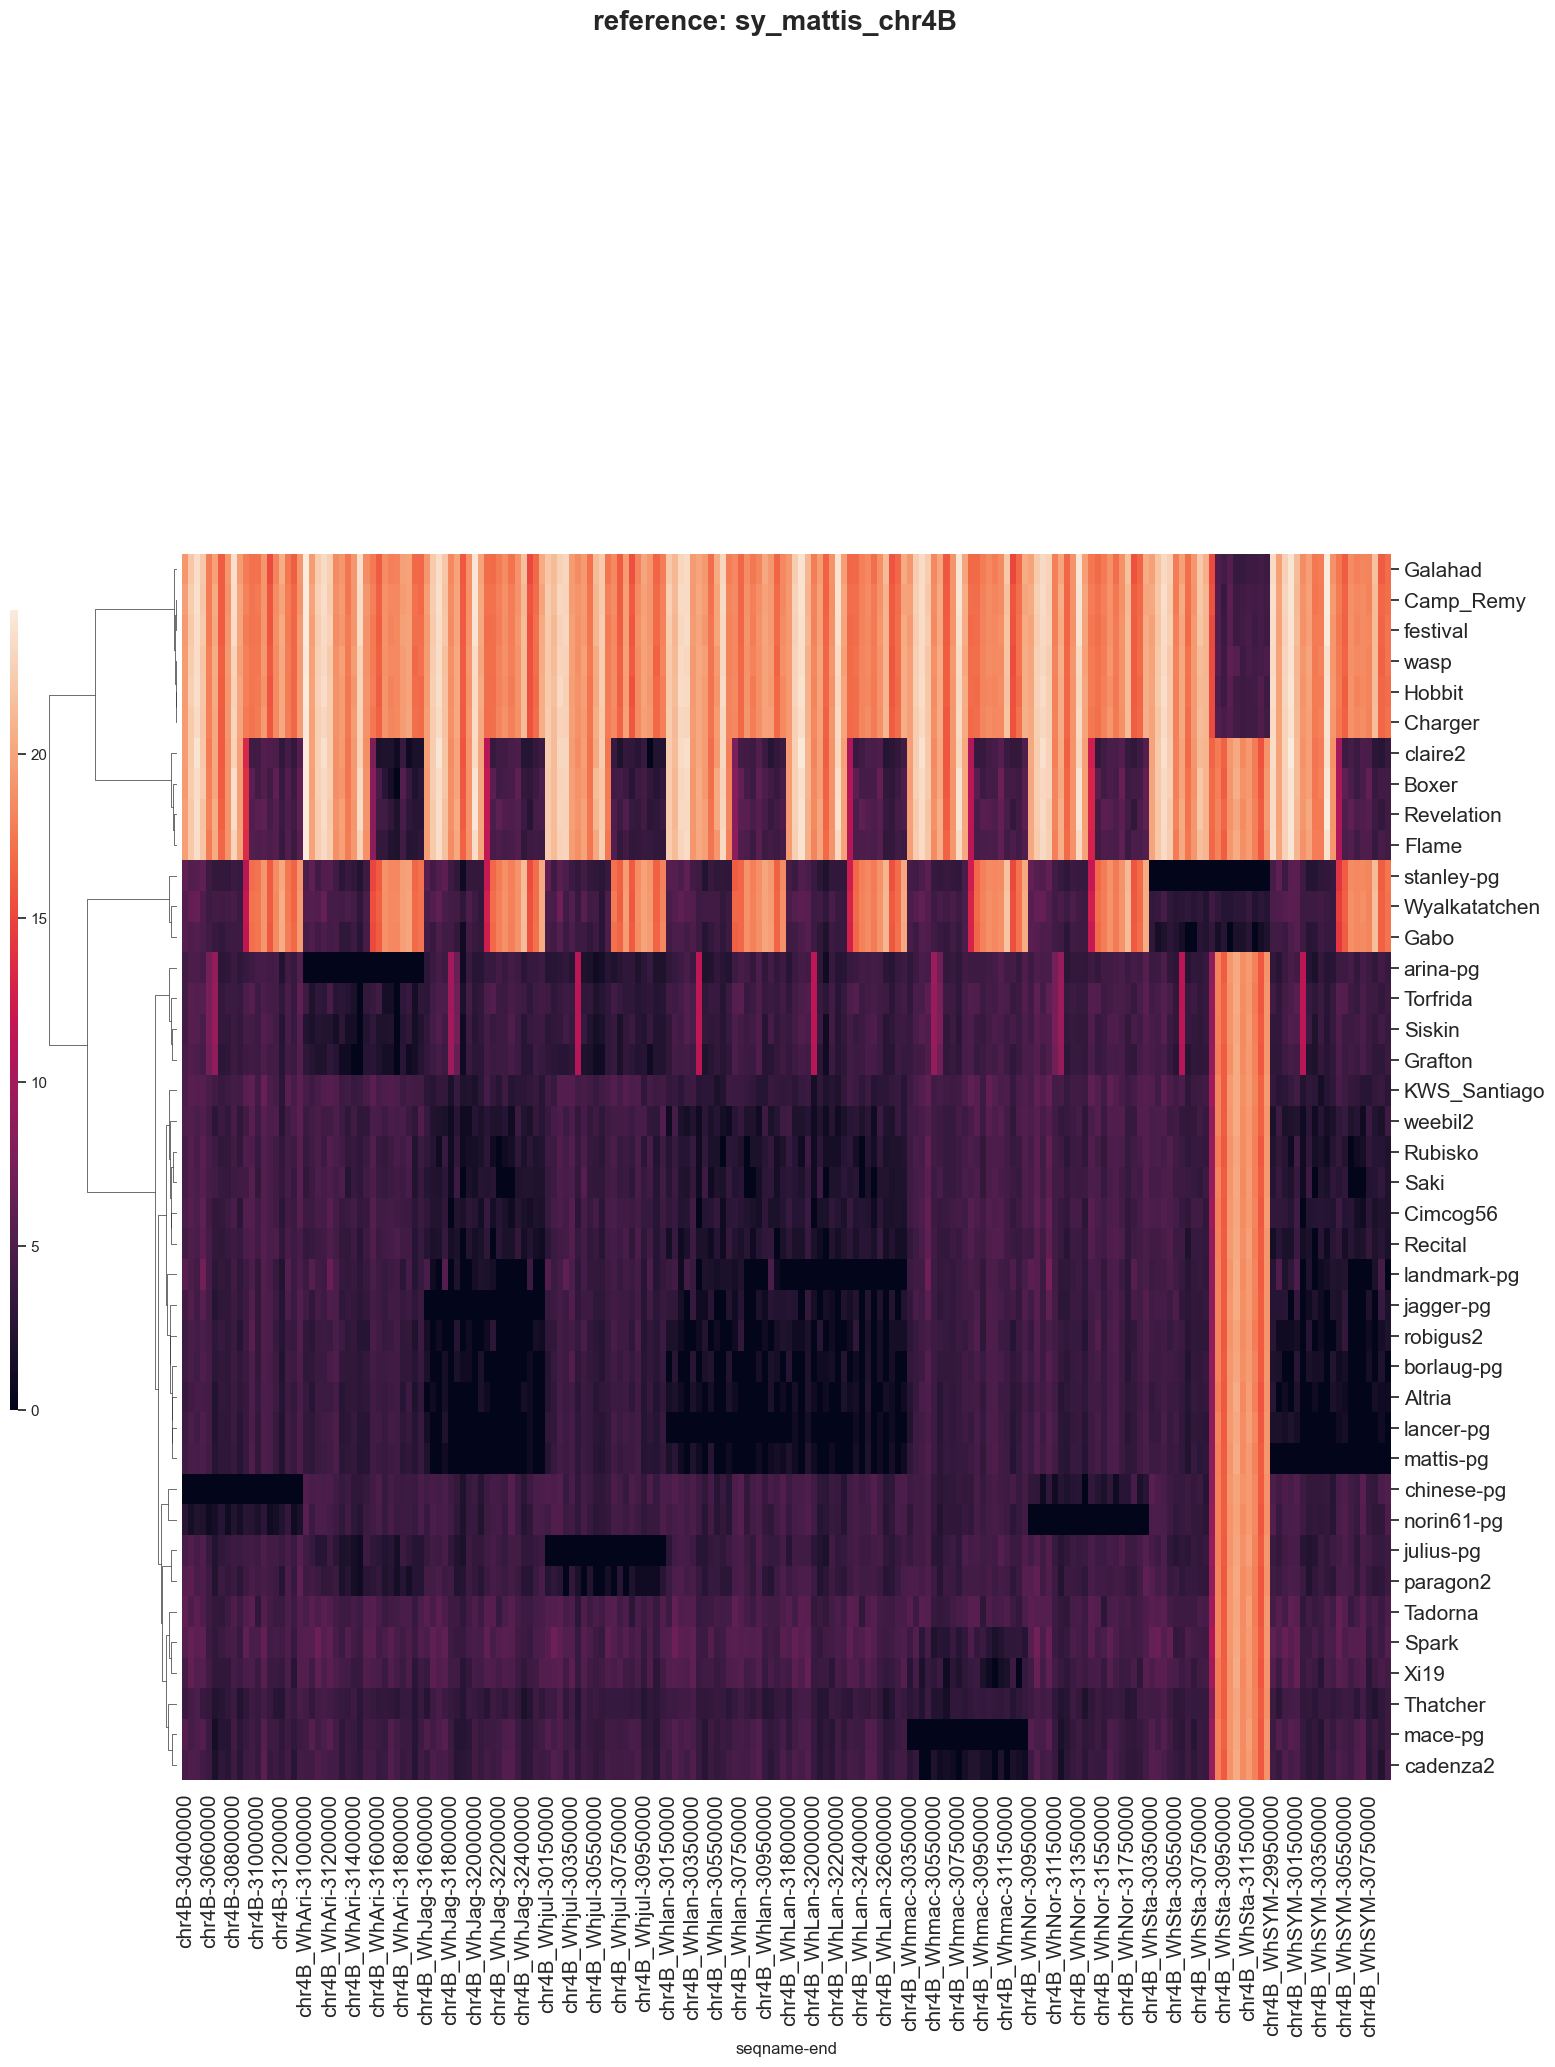

In [69]:
fig_size=(15,20)
df_t = transpose_df(dfs_concat)
plot_culstermap_col(df_t, fig_size).fig.suptitle(f'reference: {reference}_{chromosome}', fontsize=20, weight="bold", x=0.5, y=1)
# plt.savefig(f'{chromosome}_{reference}_clustermap.pdf', bbox_inches='tight')